### Group Contributions Statement

The three of together worked on cleaning the data and choosing which variables we wanted to work with. Ryan created the first scatterplot in which the species are all on the same plot. Maggie created the next two histograms. Yixiang made the faceted histogram seperated by island. Maggie used the sklearn model to find the correlation scores. Ryan made the correlation heatmap. Ryan made the confusion matrix function. Yixiang made the decision boundary function. Ryan did the neural network model. Maggie did the random forest model. Roger did the logistic regression model. We checked each others work before turning in.

### Data import and cleaning

In [289]:
#imports all modules that we will be using later on
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LinearSegmentedColormap
from sklearn.feature_selection import f_classif
import warnings


url = "https://philchodrow.github.io/PIC16A/content/IO_and_modules/IO/palmer_penguins.csv"
penguins = pd.read_csv(url)
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In [290]:
X = penguins[['Island','Culmen Length (mm)','Clutch Completion','Culmen Depth (mm)',
              'Flipper Length (mm)','Body Mass (g)','Sex','Delta 15 N (o/oo)','Delta 13 C (o/oo)']]
#creates X with columns that we decided may or may not be useful later on based on penguins dataset
y = penguins['Species']
#creates y with dependent variable based on penguins dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#splits X and y into training and test groups
X_train.shape,X_test.shape,y_train.shape,y_test.shape
#verifies that X and Y are proper shape

((275, 9), (69, 9), (275,), (69,))

In [291]:
"""adds labels to dataframe"""
def labeldf(df):
    df = pd.DataFrame(df)
    le = preprocessing.LabelEncoder()
    df = df.apply(le.fit_transform)
    return df

"drops na values from dataframe"
def cleandf(df):
    df = df.dropna() 
    df = df[df['Sex']!='.']
    #gets rid of values where sex is a .
    return df
X = labeldf(X)
y = labeldf(y)
X_train = labeldf(cleandf(X_train))
X_test = labeldf(cleandf(X_test))
y_train = labeldf(y_train)
y_test = labeldf(y_test)

In [292]:
new_train_index = [index for index in X_train.index if index in y_train.index]
y_train = y_train.loc[new_train_index]
new_test_index = [index for index in X_test.index if index in y_test.index]
y_test = y_test.loc[new_test_index]
X_train.shape,X_test.shape,y_train.shape,y_test.shape
#verifies that each df is of matching shape

((260, 9), (64, 9), (260, 1), (64, 1))

In [293]:
X_train.head()

,Island,Culmen Length (mm),Clutch Completion,Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
66,0,9,1,30,19,13,0,110,121
229,0,96,1,22,37,67,1,42,173
7,2,38,0,64,19,53,1,230,208
140,1,43,1,39,17,14,0,212,149
323,0,113,1,18,48,74,1,131,136


### Exploratory Analysis

Text(0.5, 0.98, 'Culmen Depth vs Culmen Length')

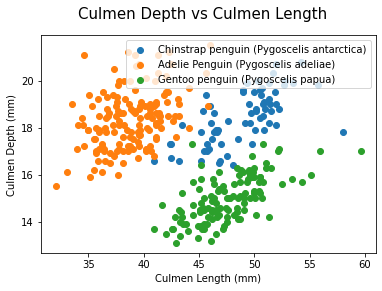

In [294]:
"""creates scatterplot of penguin culmen depth and length colored by species"""
fig, ax = plt.subplots(1)
#resets figure
species = set(penguins['Species'])
#creates list based on all possible species

for s in species:
    # for each species
    i = penguins[penguins['Species'] == s]
    #creates new df based on boolean mask
    ax.scatter(i['Culmen Length (mm)'], i['Culmen Depth (mm)'], label = s)
    #scatter plot for that species

ax.legend()
#adds legend
ax.set(xlabel = 'Culmen Length (mm)',
       ylabel = 'Culmen Depth (mm)')
#sets x and y labels
fig.suptitle('Culmen Depth vs Culmen Length', fontsize=15)
#sets title

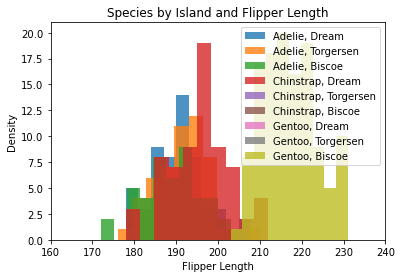

In [295]:
"""creates histogram of df by species and island of flipper length"""
penguins["Species"] = penguins["Species"].str.split().str.get(0) 

fig, ax = plt.subplots(1) 
#resets fig, ax var
species = set(penguins['Species']) 
#assigns all possible species to species var
location = set(penguins['Island'])
#assigns all possible islands to island var
ax.set(xlabel = 'Flipper Length', 
       ylabel = 'Density',
       title = 'Species by Island and Flipper Length')
#sets xlabel, ylabel, and title

for s in species:
    # for every species
    i = penguins[penguins['Species'] == s] 
    #i is boolean mask based on spcies
    for l in location:
        #for every location
        t = i[i['Island'] == l]
        #t is boolean mask based on island
        ax.hist(t['Flipper Length (mm)'], label = str(s) + ', ' + str(l) , alpha = 0.8) 
        #creates histogram
        ax.set_xlim([160,240])
        #sets boundaries of histogram
ax.legend()
#show legend

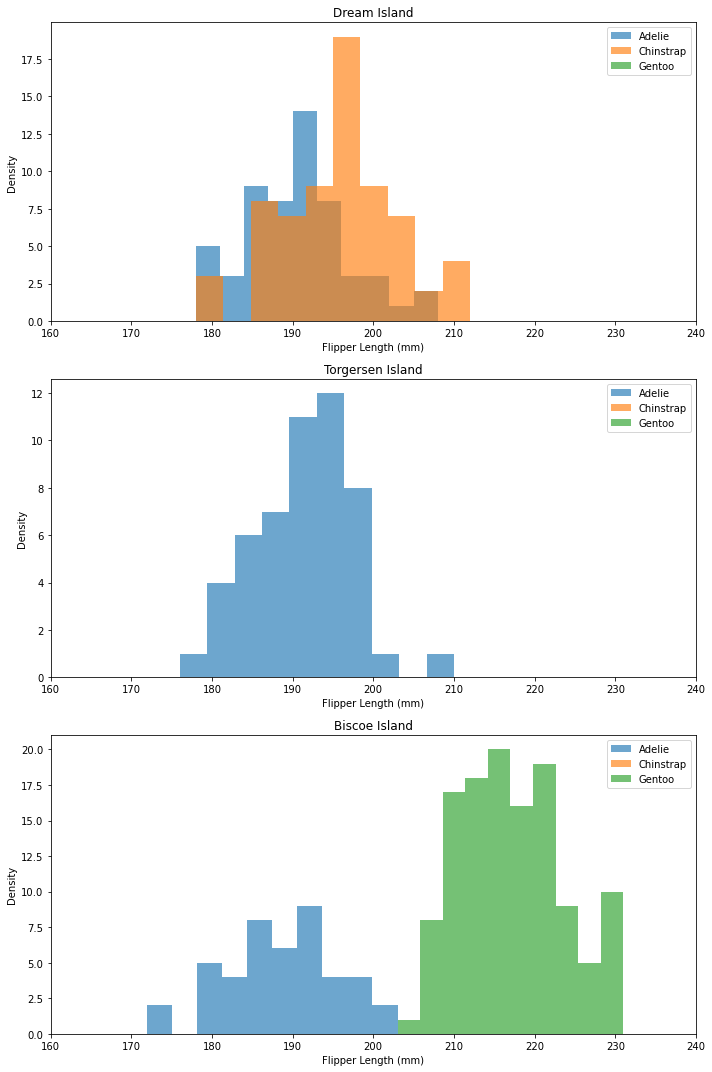

In [296]:
fig, ax = plt.subplots(3) 
#creates faceted histogram with 3
species = set(penguins['Species']) 
location = set(penguins['Island'])
"""This code is essentially the same as the last histogram except it 
seperates the values by island in a facted manner"""
fig.set_figheight(15) 
fig.set_figwidth(10)

count = 0

for l in location:
    for s in species:
        i = penguins[penguins['Species'] == s]
        t = i[i['Island'] == l]
        ax[count].hist(t['Flipper Length (mm)'], label = str(s), alpha = 0.65)
        ax[count].legend()
        ax[count].set(xlabel = 'Flipper Length (mm)', ylabel = 'Density') 
        ax[count].set_title(str(l) + ' Island') 
        ax[count].set_xlim([160,240])
    count += 1    
plt.tight_layout()


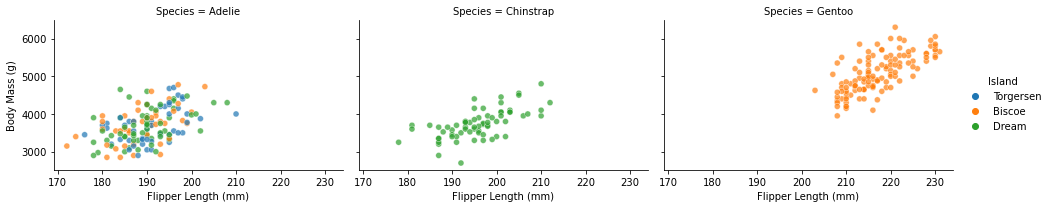

In [297]:
"""Faceted scatterplot of penguins based on island and species"""
fgrid = sns.relplot(x = 'Flipper Length (mm)', 
                    y = 'Body Mass (g)', 
                    hue = "Island", 
                    data = penguins,
                    alpha = .7,
                    col = "Species",
                    height = 3,
                    aspect = 1.5)

### Feature Selection

In [298]:
threshold = 5
high_score_features = []
feature_scores = f_classif(X_train, y_train)[0]

for score, f_name in sorted(zip(feature_scores, X_train.columns), reverse=True)[:threshold]:
    print(f_name, score) 
    high_score_features.append(f_name)

Flipper Length (mm) 434.2708407870942
Culmen Length (mm) 325.7585302013788
Culmen Depth (mm) 292.92016626210295
Body Mass (g) 265.6890285388772
Delta 15 N (o/oo) 186.79477568335153


Highest scores refers to greater correlation with Species variable. Flipper Length, Culmen Length, and Culmen Depth have the highest correlation based on this machine learning algorithm.

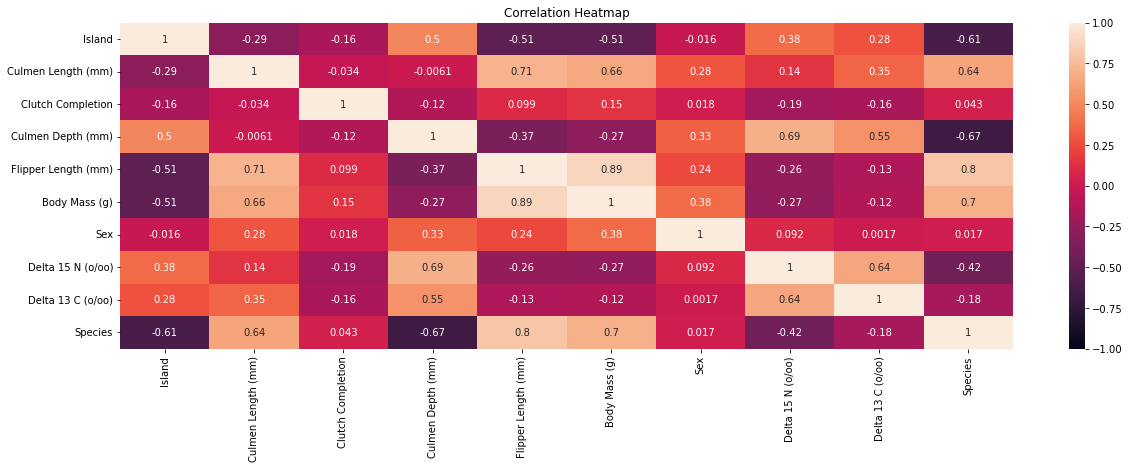

In [299]:
train = pd.concat([X_train,y_train],axis=1)
#combines training data from X and Y
test = pd.concat([X_test,y_test],axis=1)
#combines test data from X and y
new_penguins = pd.concat([train,test],axis=0)
#combines cleaned data into new dataframe

plt.figure(figsize=(20, 6))
#sets figsize
heatmap = sns.heatmap(new_penguins.corr(), vmin=-1, vmax=1, annot=True)
#makes heatmap of correlation of new_penguins df
heatmap.set_title('Correlation Heatmap')
#sets label
plt.show()
#shows heatmap

Based on the data we've gotten from above we've decided that Culmen Depth, Culmen Length for our quantitative variables as they happen to have a relatively high correlation with Species. We also decided to use Island as our categorical variable as it has the highest correlation with species among other categorical variables.

### Modeling

In [300]:
features = ['Culmen Depth (mm)', 'Flipper Length (mm)', 'Island']
# features = ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']
#features we decided to use
X_train = X_train[features]
#masks X_train to only relevant features
X_test = X_test[features]
#masks X_train to only relevant features
y_train = y_train['Species'].to_list()
#converts df to list for ease of use
y_test = y_test['Species'].to_list()
#converts df to list for ease of use

In [301]:
'''function that makes a confusion matrix using predicted values as compared to actual values'''

def makeCM(y_pred, score):
    plt.clf()
    #resets figure
    cf_matrix = confusion_matrix(y_test, y_pred)
    #uses confusion matrix function to create matrix
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues_r')
    #creates heatmap based on cf_matrix
    ax.set_xlabel('Predicted Species')
    #sets x label
    ax.set_ylabel('Actual Species');
    #sets y label
    ax.xaxis.set_ticklabels(['Adelie','Chinstrap','Gentoo'])
    #sets tick labels
    ax.yaxis.set_ticklabels(['Adelie','Chinstrap','Gentoo'])
    #sets tick labels
    plt.title('Accuracy Score: {0}'.format(round(score,4)), size = 10); 
    #prints accuracy score as title
    return plt

In [302]:
"""Makes decision boundary"""

def plot_decision_boundary(model):
    qual_names = list(set(penguins['Island']))
    qual_names.sort()
    qual_fts = list(set(X['Island']))
    sp_names = ['Adelie','Chinstrap','Gentoo']
    sp_col = ['red','green','blue']
    masks = []
    for i in range(len(qual_fts)):
        masks.append(X['Island'] == qual_fts[i])

    for i in range(len(masks)):
        xi = X[masks[i]]
        x0 = xi[features[0]]
        x1 = xi[features[1]]
        yi = y['Species'][masks[i]]
        grid_x = np.linspace(x0.min(),x0.max(),501)
        grid_y = np.linspace(x1.min(),x1.max(),501)
        z = qual_fts[i]*np.ones(501*501)
        xx,yy = np.meshgrid(grid_x,grid_y)

        XX = xx.ravel()
        YY = yy.ravel()
        ZZ = z.ravel()

        p = model.predict(pd.DataFrame(np.c_[XX,YY,ZZ],columns=features))
        p_values = list(set(p))
        yi_values = list(set(yi))
        color_region = []
        color_scatter = []
        for j in range(len(p_values)): 
            color_region.append(sp_col[p_values[j]])
        for k in range(len(yi_values)): 
            color_scatter.append(sp_col[yi_values[k]])

        self_cmap_region = LinearSegmentedColormap.from_list('mycmap',color_region)

        p=p.reshape(xx.shape)

        fig,ax = plt.subplots(1)

        ax.contourf(xx,yy,p,cmap=self_cmap_region,alpha=.2)

        for s in range(len(yi_values)): 
            maskl = yi==yi_values[s]
            ax.scatter(x0[maskl], x1[maskl], color=sp_col[yi_values[s]], label=sp_names[yi_values[s]])
            ax.set(title="Island"+': '+ qual_names[i])
            ax.set(xlabel = features[0], ylabel = features[1])
            ax.legend()



In [303]:
# from sklearn.neighbors import KNeighborsClassifier
# bestcv = -np.inf
# for i in range(1,30):
#     clf = KNeighborsClassifier(n_neighbors = i)
#     model = clf.fit(X_train, y_train)
#     newcv = cross_val_score(clf, X_train, y_train, cv = 10).mean()
#     if newcv > best_score:
#         best_score = newcv
#         best_train = model.score(X_train, y_train)
#         best_test = model.score(X_test, y_test)
#         best_k = i
# best_train, best_test

**Nearest Neighbor**

Best Hidden Layer Size:  10
Test Score Accuracy:  0.765625
Train Score Accuracy:  0.8423076923076923
<module 'matplotlib.pyplot' from 'C:\\Users\\Wiggles\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


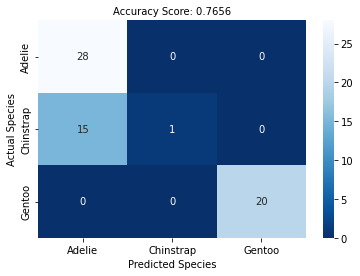

In [304]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)
#sets seed to get consistent results
bestcv = 0
#sets bestcv variable to 0
warnings.filterwarnings("ignore")
#ignores warnings
for i in range (1,30):
#from 1 to 30
    clf = clf = KNeighborsClassifier(n_neighbors = i)
    #create model based on i number of neighbors
    model = clf.fit(X_train, y_train)
    #fit X_train and y_train to model
    newcv = cross_val_score(clf, X_train, y_train, cv = 10).mean()
    #create cross val score for fitted model
    if newcv > bestcv:
        #if better cv score found
        bestcv = newcv
        #set bescv as new cv
        besti = i
        #best hidden layer size is i
        testscore = model.score(X_test, y_test)
        #set best test score
        trainscore = model.score(X_train, y_train)
        #set best model score
        bestcm = makeCM(model.predict(X_test), testscore)
        #set best confusion matrix
print("Best Hidden Layer Size:  " + str(besti))
print("Test Score Accuracy:  " + str(testscore))
print("Train Score Accuracy:  " + str(trainscore))
print(bestcm)
#print best values


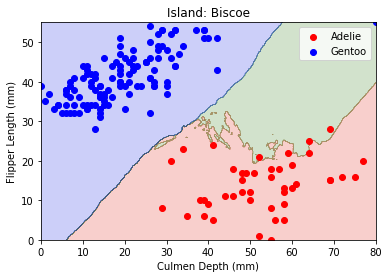

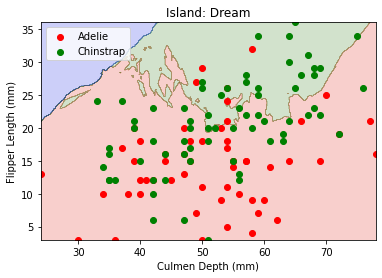

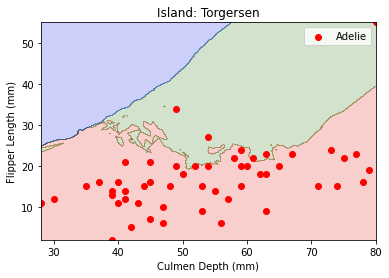

In [305]:
plot_decision_boundary(model)
#creates decision boundary models based on island

**Random Forest**


Best N_Estimator:  15
Best Test Score Accuracy:  0.765625
Best Train Score Accuracy:  0.9730769230769231
<module 'matplotlib.pyplot' from 'C:\\Users\\Wiggles\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


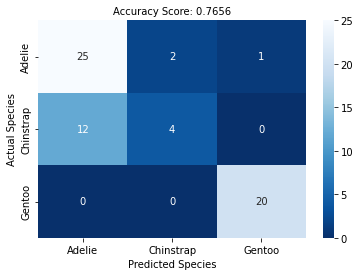

In [306]:
"""very much of the same from the previous model except clf is a random forest classifier rather than an MLP classifier"""
np.random.seed(42)
bestcv = 0
for i in range (1,30):
    clf = RandomForestClassifier(n_estimators = i)
    bestmodel = clf.fit(X_train, y_train)
    newcv = cross_val_score(clf, X_train, y_train, cv = 10).mean()
    if newcv > bestcv:
        bestcv = newcv
        besti = i
        testscore = bestmodel.score(X_test, y_test)
        trainscore = bestmodel.score(X_train, y_train)
        bestcm = makeCM(bestmodel.predict(X_test), testscore)
print("Best N_Estimator:  " + str(besti))
print("Best Test Score Accuracy:  " + str(testscore))
print("Best Train Score Accuracy:  " + str(trainscore))
print(bestcm)

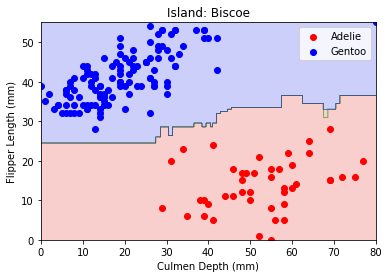

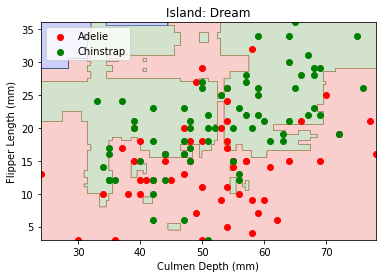

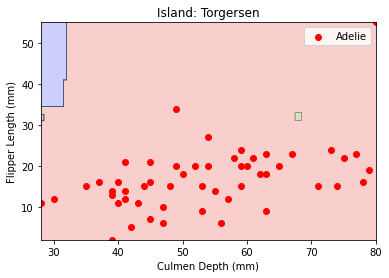

In [307]:
plot_decision_boundary(bestmodel)

**Logistic Regression**

Best N_Estimator:  1
Best Test Score Accuracy:  0.75
Best Train Score Accuracy:  0.8423076923076923
<module 'matplotlib.pyplot' from 'C:\\Users\\Wiggles\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


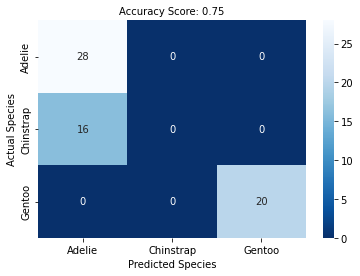

In [308]:
"""very much of the same from the previous model except clf is a Logistic Regression rather than an MLP classifier"""
np.random.seed(42)
bestcv = 0
for i in range (1,50):
    clf = LogisticRegression(C = i*.1, max_iter = 5000).fit(X_train, y_train)
    bestmodel = clf.fit(X_train, y_train)
    newcv = cross_val_score(clf, X_train, y_train, cv = 10).mean()
    if newcv > bestcv:
        bestcv = newcv
        besti = i
        testscore = bestmodel.score(X_test, y_test)
        trainscore = bestmodel.score(X_train, y_train)
        bestcm = makeCM(bestmodel.predict(X_test), testscore)
print("Best N_Estimator:  " + str(besti))
print("Best Test Score Accuracy:  " + str(testscore))
print("Best Train Score Accuracy:  " + str(trainscore))
print(bestcm)

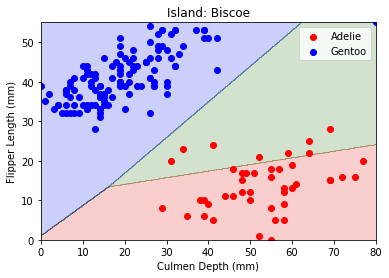

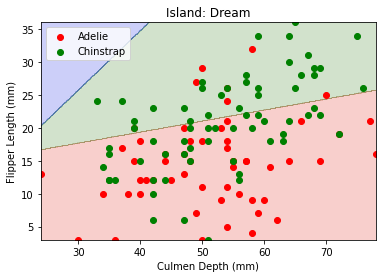

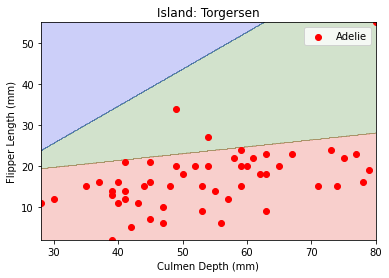

In [309]:
plot_decision_boundary(bestmodel)

### Discussion